In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9953/9953 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 0.0030
Epoch 2/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 2.2581e-04
Epoch 3/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 2.1681e-04
Epoch 4/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.8957e-04
Epoch 5/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - loss: 1.8349e-04
Epoch 6/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 1.8080e-04
Epoch 7/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 1.7889e-04
Epoch 8/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 1.8178e-04
Epoch 9/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.8173e-04
Epoch 10/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 1.7893e-04
Epoch 11/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 1.7903e-04
Epoch 12/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 1.7671e-04
Epoch 13/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 1.8021e-04
Epoch 14/20
9953/9953 ━━━━━━━━━━━━━━━━━━━━ 82s 4m

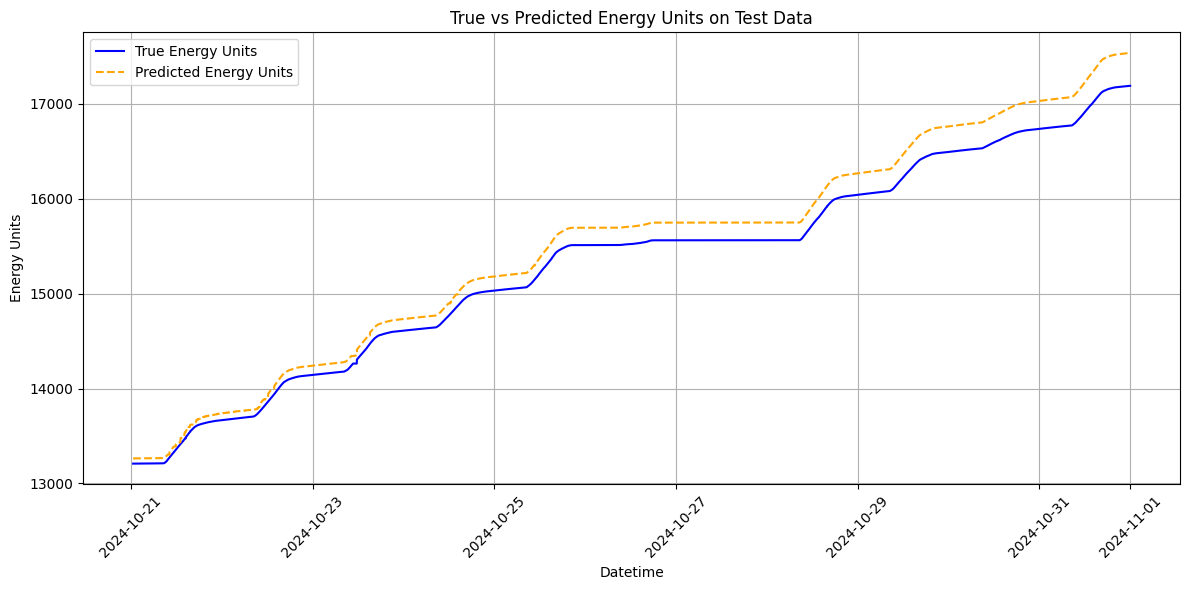

In [ ]:
# Load your dataset
data = pd.read_csv('capsepoct2024.csv')

# ===========================================
# Step 1: Data Preparation
# ===========================================
data = data[['datetime', 'totalRealPower', 'energyUnits']]
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')

# ===========================================
# Step 2: Create Lag Features (for 3 lags)
# ===========================================
num_lags = 3  # Number of lagged days (only 3 lags now)
for lag in range(1, num_lags+1):
    data[f'energyUnits_lag_{lag}'] = data['energyUnits'].shift(lag)

data = data.dropna()

# ===========================================
# Step 3: Prepare Features and Target Variable
# ===========================================
features = ['energyUnits_lag_1', 'energyUnits_lag_2', 'energyUnits_lag_3']
X = data[features]
y = data['energyUnits']

# ===========================================
# Step 4: Scale the Features and Target
# ===========================================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM: [samples, time steps, features]
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# ===========================================
# Step 5: Train-Test Split
# ===========================================
train_size = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# ===========================================
# Step 6: Define and Train the LSTM Model
# ===========================================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# ===========================================
# Step 7: Test Predictions and Plot Results
# ===========================================
y_pred_scaled = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Plot the actual vs predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'].iloc[train_size:], y_test_rescaled, label='True Energy Units', color='blue')
plt.plot(data['datetime'].iloc[train_size:], y_pred_rescaled, label='Predicted Energy Units', color='orange', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Energy Units')
plt.title('True vs Predicted Energy Units on Test Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Future Predictions (Next 15 Days)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for day 1: 17535.359375
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for day 2: 17660.5
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for day 3: 17844.654296875
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for day 4: 18090.396484375
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for day 5: 18301.83203125
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for day 6: 18549.40625
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for day 7: 18821.703125
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for day 8: 19107.705078125
Shape of initial_lags after update: (1, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predi

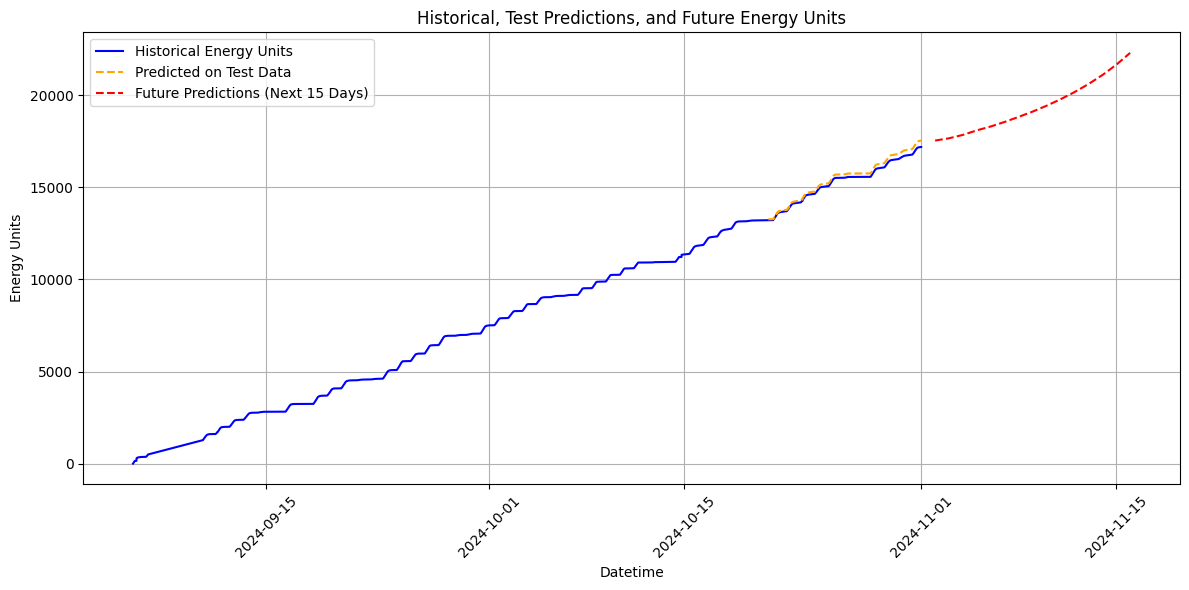

In [ ]:

initial_lags = X_test[-1].reshape(1, 1, X_test.shape[2])
future_predictions = []
all_lagged_values = []

for day in range(15):  # Next 15 days
    # Predict for the next day
    future_pred_scaled = model.predict(initial_lags)
    future_pred = scaler_y.inverse_transform(future_pred_scaled)
    future_predictions.append(future_pred[0, 0])
    print(f"Prediction for day {day + 1}: {future_pred[0, 0]}")

    all_lagged_values.append(initial_lags.reshape(-1))  # Save the current lags

    # Update lags by shifting the current lags and adding new prediction as latest lag
    # For the first prediction (i.e., day 1), use the original lags (lag1, lag2, lag3).
    # For subsequent predictions, update the lag values using the predicted value.
    new_lags = np.concatenate([
        initial_lags[:, :, 1:],  # Drop the oldest lag
        future_pred_scaled.reshape(1, 1, 1)  # Add the predicted value as the new lag
    ], axis=2)

    initial_lags = new_lags
    print(f"Shape of initial_lags after update: {initial_lags.shape}")

# Generate future dates starting from the last datetime in the dataset
last_datetime = data['datetime'].iloc[-1]
future_times = pd.date_range(last_datetime, periods=16, freq='D')[1:]

future_predictions_df = pd.DataFrame({'datetime': future_times, 'Predicted Energy Units': future_predictions})

lagged_values_df = pd.DataFrame(all_lagged_values, columns=[f'lag_{i+1}' for i in range(initial_lags.shape[2])])
lagged_values_df['Predicted Energy Units'] = future_predictions_df['Predicted Energy Units']

print("\nFuture Predictions (Next 15 Days):")
print(future_predictions_df)

print("\nLagged features for each future prediction step:")
print(lagged_values_df)

# Append future predictions to original data
updated_data = pd.concat([data[['datetime', 'energyUnits']], future_predictions_df.set_index('datetime')])
updated_data.reset_index(inplace=True)

print("\nUpdated Data with Future Predictions:")
print(updated_data.tail(20))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['energyUnits'], label='Historical Energy Units', color='blue')
plt.plot(data['datetime'].iloc[train_size:], y_pred_rescaled, label='Predicted on Test Data', color='orange', linestyle='--')
plt.plot(future_predictions_df['datetime'], future_predictions_df['Predicted Energy Units'], label='Future Predictions (Next 15 Days)', color='red', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Energy Units')
plt.title('Historical, Test Predictions, and Future Energy Units')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Save the final predictions to a CSV file
future_predictions_df.to_csv('future_predictions.csv', index=False)

lagged_values_df = pd.DataFrame(all_lagged_values, columns=[f'lag_{i+1}' for i in range(initial_lags.shape[2])])

future_predictions_df_with_lags = pd.concat([future_predictions_df, lagged_values_df], axis=1)

updated_data_with_lags = pd.concat([data[['datetime', 'energyUnits']], future_predictions_df_with_lags.set_index('datetime')])

updated_data_with_lags.to_csv('updated_data_with_predictions_and_lags.csv', index=False)

print("Predictions and lag features have been saved to 'future_predictions.csv' and 'updated_data_with_predictions_and_lags.csv'.")


Predictions and lag features have been saved to 'future_predictions.csv' and 'updated_data_with_predictions_and_lags.csv'.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 191.45082969958895
Mean Squared Error (MSE): 42034.17430191175
Root Mean Squared Error (RMSE): 205.02237512503788
R-squared (R²): 0.9563014227925358
